In [103]:
import openpyxl
print("openpyxl installed successfully!")


openpyxl installed successfully!


In [104]:
import openpyxl
import pandas as pd
from openpyxl.utils import column_index_from_string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

print("openpyxl installed successfully!")

# Load the Excel file
df = pd.read_excel("Book2 for ML.xlsx", engine="openpyxl")

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Print all column names to verify
print("All Columns:", df.columns.tolist())

# Define selected Excel column letters (Ensure 'SFSS' is included)
selected_columns_excel = ["E", "F", "I", "N", "U", "W", "X", "Y", "Z", "AA", "AI", "AK", "AY", 
                          "BF", "BG", "BH", "BQ", "BT", "CB", "CD", "CI", "CS", "CP", "GK", "HZ", "IA", "KV"]

# Convert Excel column letters to Pandas indices
selected_indices = [column_index_from_string(col) - 1 for col in selected_columns_excel]

# Ensure indices are valid
num_columns = len(df.columns)
valid_indices = [i for i in selected_indices if i < num_columns]

# Select the columns
df_selected = df.iloc[:, valid_indices]

# Add SFSS column explicitly
if "SFSS" in df.columns:
    df_selected["SFSS"] = df["SFSS"]

# Print selected column names
print("Selected Columns:", df_selected.columns.tolist())

# Drop rows where SFSS is missing
df_selected = df_selected.dropna(subset=["SFSS"])
print("Remaining rows after dropping NaN in SFSS:", len(df_selected))

# Convert Yes/No to 1/0
df_selected["SFSS"] = df_selected["SFSS"].map({"Yes": 1, "yes": 1, "No": 0, "no": 0})
print(df_selected["SFSS"].value_counts())

# Fill missing categorical values with mode
categorical_cols = ["GENDER", "RECONSTRUCTION", "DM", "ENCEPHALOPATHY", "ASCITES", "Porto-caval shunt"]
for col in categorical_cols:
    if col in df_selected.columns:
        df_selected[col] = df_selected[col].fillna(df_selected[col].mode()[0])

# Define numeric columns
numeric_columns = df_selected.select_dtypes(include=["number"]).columns.tolist()

# Fill missing numeric values
for col in numeric_columns:
    if col in ["MELD at Surgery", "End Portal Pressure", "CHILD PUGH SCORE"]:
        df_selected[col] = df_selected[col].fillna(df_selected[col].median())
    else:
        df_selected[col] = df_selected[col].fillna(df_selected[col].mean())

# Save cleaned dataset
df_selected.to_csv("cleaned_data.csv", index=False)
print("Cleaned data saved as cleaned_data.csv")

# Handle categorical replacements
df_selected[categorical_cols] = df_selected[categorical_cols].replace("Not Mentioned", df_selected[categorical_cols].mode().iloc[0])

# One-Hot Encode categorical variables
df_encoded = pd.get_dummies(df_selected, columns=categorical_cols, drop_first=True)

# Convert object columns to numeric
for col in df_encoded.columns:
    df_encoded[col] = pd.to_numeric(df_encoded[col], errors="coerce")

# Remove empty columns (columns with only NaN)
df_encoded.dropna(axis=1, how="all", inplace=True)

# Define features and target variable
X = df_encoded.drop(columns=["SFSS"])
y = df_encoded["SFSS"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values after splitting
imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression Model
model = LogisticRegression(max_iter=500, solver="liblinear")
model.fit(X_train, y_train)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

print("Unique values in y_train:", y_train.unique())
print("Unique values in y_test:", y_test.unique())


# Predictions
y_pred = (y_pred > 0.5).astype(int)  # Threshold at 0.5
y_pred = model.predict(X_test)




# Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))




openpyxl installed successfully!
All Columns: ['GROUP', 'Tx.NO', 'RECIPIENT NAME', 'UHID', 'AGE', 'GENDER', 'BLOOD GROUP', 'PRIMARY DIAGNOSIS', 'MELD at Surgery', 'PP before explant', 'PP after portal reperfusion', 'PP after artery reperfusion', 'Post modulation PP', 'End Portal Pressure', 'APOLT, CLKT, SPLIT LIVER Tx, SWAP LIVER, DUAL GRAFT, ORTHOTOPIC', 'RELATIONSHIP', 'DATE OF SURGERY', 'LENGTH OF HOSPITAL STAY', 'Open / Robotic', 'LIVER LOBE', 'RECONSTRUCTION', 'ADDITIONAL PROCEDURES(Hep J, SAL, Splenectomy)', 'HEIGHT', 'WEIGHT', 'GRAFT WEIGHT', 'CIT', 'SECONDARY WARM ISCHAEMIC TIME', 'Duration of surgery', 'ACTUAL GRWR', 'BMI', 'SURVIVAL STATUS', 'DATE OF DEATH', 'CAUSE OF DEATH', 'PEAK LACTATE', 'END LACTATE', 'ICU STAY (in days)', 'Blood loss', 'Intraop PRC', 'Intraop FFP', 'Intraop Cryo', 'Intraop Platelet', 'Intraop Doppler', 'Baseline Portal Pressure', 'Baseline Pressure after PV clamping', 'Post PV and IVC clamping (Preexplant)', 'Post Reperfusion Portal Pressure', 'Post Mod

C:\Users\dell\AppData\Local\Temp\ipykernel_25592\1280494321.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["SFSS"] = df["SFSS"]
C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

C:\Users\dell\AppData\Local\Temp\ipykernel_25592\1840256780.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


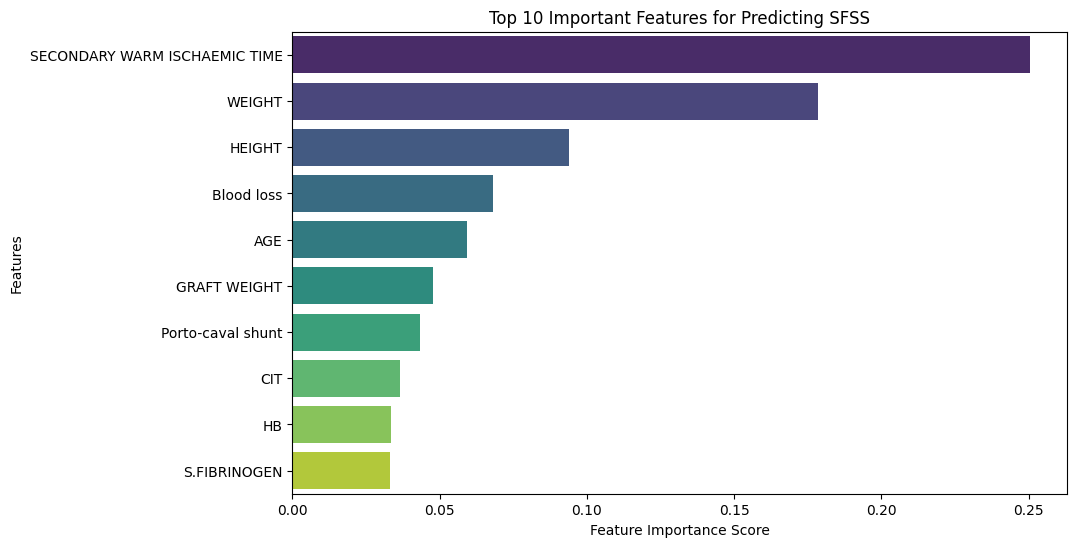

Features Selected by RFE: Index(['AGE', 'MELD at Surgery', 'HEIGHT', 'WEIGHT', 'GRAFT WEIGHT',
       'SECONDARY WARM ISCHAEMIC TIME', 'HB', 'PLATELET COUNT',
       'TOTAL BILLIRUBIN', 'CREATININE'],
      dtype='object')


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Load the cleaned dataset
df = pd.read_csv("cleaned_data.csv")

# Convert categorical variables to numeric
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert categorical values to numbers
    label_encoders[col] = le  # Store encoders if needed later

# Separate features and target
X = df.drop(columns=['SFSS'])
y = df['SFSS']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest model for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=df.drop(columns=['SFSS']).columns)
top_features = feature_importances.nlargest(10)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features for Predicting SFSS")
plt.show()

# Use RFE for feature selection
selector = RFE(rf, n_features_to_select=10)
selector.fit(X_train, y_train)

# Selected features
selected_features = X.columns[selector.support_]
print("Features Selected by RFE:", selected_features)





In [106]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create an MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (SFSS yes/no)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with epochs
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))


Epoch 1/50


C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8920 - loss: 0.6848 - val_accuracy: 0.8400 - val_loss: 0.6672
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9956 - loss: 0.6507 - val_accuracy: 0.8400 - val_loss: 0.6414
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9964 - loss: 0.6163 - val_accuracy: 0.8400 - val_loss: 0.6161
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9874 - loss: 0.5843 - val_accuracy: 0.8400 - val_loss: 0.5910
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9883 - loss: 0.5498 - val_accuracy: 0.8400 - val_loss: 0.5652
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9921 - loss: 0.5125 - val_accuracy: 0.8400 - val_loss: 0.5393
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9937 - loss: 0.4748 - val_accuracy: 0.8400 - val_loss: 0.5140
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9940 - loss: 0.4379 - val_accuracy: 0.8400 - val_loss: 0.4902
Ep

In [66]:
# Define selected Excel column letters
selected_columns_excel = ["E", "F", "I", "N", "U", "W", "X", "Y", "Z", "AA", "AI", "AK", "AY", 
                          "BF", "BG", "BH", "BQ", "BT", "CB", "CD", "CI", "CS", "CP", "GK", "HZ", "IA", "KV"]

# Convert Excel column letters to Pandas zero-based indices
selected_indices = [column_index_from_string(col) - 1 for col in selected_columns_excel]

# Ensure indices are within the valid column range
num_columns = len(df.columns)
valid_indices = [i for i in selected_indices if i < num_columns]

# Select the columns
df_selected = df.iloc[:, valid_indices]

# Print selected column names
print("Selected Columns:", df_selected.columns.tolist())

Selected Columns: ['AGE', 'GENDER', 'MELD at Surgery', 'End Portal Pressure', 'RECONSTRUCTION', 'HEIGHT', 'WEIGHT', 'GRAFT WEIGHT', 'CIT', 'SECONDARY WARM ISCHAEMIC TIME', 'END LACTATE', 'Blood loss', 'DM', 'ENCEPHALOPATHY', 'ASCITES', 'CHILD PUGH SCORE', 'HB', 'PLATELET COUNT', 'INR', 'S.FIBRINOGEN', 'TOTAL BILLIRUBIN', 'CREATININE', 'ALBUMIN', 'Porto-caval shunt', 'Intraop peak lactate', 'Intraop End lactate', 'SFSS']


In [67]:
# Check missing values in SFSS column
print("Missing SFSS values:", df_selected["SFSS"].isnull().sum(), "/", len(df_selected))

# Drop rows where SFSS is missing
df_selected = df_selected.dropna(subset=["SFSS"])

# Print after dropping NaN values
print("Remaining rows after dropping NaN:", len(df_selected))

Missing SFSS values: 70 / 195
Remaining rows after dropping NaN: 125


In [68]:
# Convert Yes/No to 1/0
df_selected["SFSS"] = df_selected["SFSS"].map({"Yes": 1, "yes": 1, "No": 0, "no": 0})

# Check if conversion worked
print(df_selected["SFSS"].value_counts())

SFSS
0.0    119
1.0      5
Name: count, dtype: int64


In [69]:
# Count missing values in all columns
print("Missing values per column:\n", df_selected.isnull().sum())

# Option 1: Drop rows with any missing values (strict)
# df_selected = df_selected.dropna()

# Option 2: Fill missing values with mean (numeric columns)
df_selected = df_selected.fillna(df_selected.mean(numeric_only=True))

Missing values per column:
 AGE                               0
GENDER                            0
MELD at Surgery                  12
End Portal Pressure              23
RECONSTRUCTION                   38
HEIGHT                           12
WEIGHT                            0
GRAFT WEIGHT                      0
CIT                               0
SECONDARY WARM ISCHAEMIC TIME     0
END LACTATE                      23
Blood loss                        3
DM                                4
ENCEPHALOPATHY                   75
ASCITES                          77
CHILD PUGH SCORE                 68
HB                               11
PLATELET COUNT                   10
INR                              16
S.FIBRINOGEN                     19
TOTAL BILLIRUBIN                 10
CREATININE                       12
ALBUMIN                          11
Porto-caval shunt                19
Intraop peak lactate              5
Intraop End lactate               6
SFSS                              1


In [70]:
df_selected = df_selected.dropna(subset=["SFSS"])
print("Rows remaining after dropping NaN in SFSS:", len(df_selected))


Rows remaining after dropping NaN in SFSS: 125


In [71]:
# Fill missing categorical values with mode
categorical_columns = ["GENDER", "RECONSTRUCTION", "DM", "ENCEPHALOPATHY", "ASCITES", "Porto-caval shunt"]
for col in categorical_columns:
    df_selected[col] = df_selected[col].fillna(df_selected[col].mode()[0])

print("Missing values after filling categorical columns:\n", df_selected.isnull().sum())

Missing values after filling categorical columns:
 AGE                               0
GENDER                            0
MELD at Surgery                   0
End Portal Pressure               0
RECONSTRUCTION                    0
HEIGHT                            0
WEIGHT                            0
GRAFT WEIGHT                      0
CIT                               0
SECONDARY WARM ISCHAEMIC TIME     0
END LACTATE                      23
Blood loss                        3
DM                                0
ENCEPHALOPATHY                    0
ASCITES                           0
CHILD PUGH SCORE                 68
HB                               11
PLATELET COUNT                    0
INR                               0
S.FIBRINOGEN                     19
TOTAL BILLIRUBIN                 10
CREATININE                        0
ALBUMIN                           0
Porto-caval shunt                 0
Intraop peak lactate              5
Intraop End lactate               6
SFSS         

In [72]:
# Define numeric columns
numeric_columns = df_selected.select_dtypes(include=["number"]).columns.tolist()

# Fill missing numeric values
for col in numeric_columns:
    if col in ["MELD at Surgery", "End Portal Pressure", "CHILD PUGH SCORE"]:  
        # Use median for key medical scores
        df_selected[col] = df_selected[col].fillna(df_selected[col].median())
    else:
        # Use mean for other numeric values
        df_selected[col] = df_selected[col].fillna(df_selected[col].mean())

print("Missing values after filling numeric columns:\n", df_selected.isnull().sum())

Missing values after filling numeric columns:
 AGE                               0
GENDER                            0
MELD at Surgery                   0
End Portal Pressure               0
RECONSTRUCTION                    0
HEIGHT                            0
WEIGHT                            0
GRAFT WEIGHT                      0
CIT                               0
SECONDARY WARM ISCHAEMIC TIME     0
END LACTATE                      23
Blood loss                        3
DM                                0
ENCEPHALOPATHY                    0
ASCITES                           0
CHILD PUGH SCORE                 68
HB                               11
PLATELET COUNT                    0
INR                               0
S.FIBRINOGEN                     19
TOTAL BILLIRUBIN                 10
CREATININE                        0
ALBUMIN                           0
Porto-caval shunt                 0
Intraop peak lactate              5
Intraop End lactate               6
SFSS             

In [73]:
# Final check
print("Final missing values:\n", df_selected.isnull().sum())

# Save cleaned dataset
df_selected.to_csv("cleaned_data.csv", index=False)
print("Cleaned data saved as cleaned_data.csv")

Final missing values:
 AGE                               0
GENDER                            0
MELD at Surgery                   0
End Portal Pressure               0
RECONSTRUCTION                    0
HEIGHT                            0
WEIGHT                            0
GRAFT WEIGHT                      0
CIT                               0
SECONDARY WARM ISCHAEMIC TIME     0
END LACTATE                      23
Blood loss                        3
DM                                0
ENCEPHALOPATHY                    0
ASCITES                           0
CHILD PUGH SCORE                 68
HB                               11
PLATELET COUNT                    0
INR                               0
S.FIBRINOGEN                     19
TOTAL BILLIRUBIN                 10
CREATININE                        0
ALBUMIN                           0
Porto-caval shunt                 0
Intraop peak lactate              5
Intraop End lactate               6
SFSS                              0
dtype

In [78]:
print(df_selected[categorical_cols].apply(lambda x: x.unique()))


GENDER                                                       [M, F]
RECONSTRUCTION    [IRHV reconstruction, SRHV+RHV - Quilt & Fence...
dtype: object


In [79]:
for col in categorical_cols:
    df_selected[col] = df_selected[col].replace("Not Mentioned", df_selected[col].mode()[0])

# Ensure all values are valid
print(df_selected[categorical_cols].apply(lambda x: x.unique()))


GENDER                                                       [M, F]
RECONSTRUCTION    [IRHV reconstruction, SRHV+RHV - Quilt & Fence...
dtype: object


In [80]:
print(df_encoded.dtypes[df_encoded.dtypes == "object"])


END LACTATE             object
Blood loss              object
DM                      object
ENCEPHALOPATHY          object
ASCITES                 object
CHILD PUGH SCORE        object
HB                      object
S.FIBRINOGEN            object
TOTAL BILLIRUBIN        object
Porto-caval shunt       object
Intraop peak lactate    object
Intraop End lactate     object
dtype: object


In [82]:
# Convert object columns to numeric (if possible)
for col in df_encoded.columns:
    df_encoded[col] = pd.to_numeric(df_encoded[col], errors="coerce")
    
print(df_encoded.dtypes[df_encoded.dtypes == "object"])

df_encoded = pd.get_dummies(df_encoded, drop_first=True)

print(df_encoded.dtypes)  # Should show only float/int types



Series([], dtype: object)
AGE                                                                                                                                                                                         int64
MELD at Surgery                                                                                                                                                                           float64
End Portal Pressure                                                                                                                                                                       float64
HEIGHT                                                                                                                                                                                    float64
WEIGHT                                                                                                                                                                                    float64
    

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_excel("C:\\Project\\livertransplant\\Book2 for ML.xlsx")  

# Convert SFSS to binary classification
df["SFSS"] = pd.to_numeric(df["SFSS"], errors="coerce")  # Convert to numeric
df["SFSS"] = (df["SFSS"] >= 0.5).astype(int)  # Binary classification

# Identify categorical columns
categorical_cols = ["GENDER", "RECONSTRUCTION"]  # Add more if needed

# Replace "Not Mentioned" in categorical columns with the mode
for col in categorical_cols:
    df[col] = df[col].replace("Not Mentioned", df[col].mode()[0])

# One-Hot Encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert object columns to numeric
for col in df_encoded.columns:
    df_encoded[col] = pd.to_numeric(df_encoded[col], errors="coerce")

# **Fix 1: Remove Empty Columns (Columns with Only NaN)**
df_encoded.dropna(axis=1, how="all", inplace=True)

# Define features and target variable
X = df_encoded.drop(columns=["SFSS"])
y = df_encoded["SFSS"]

# **Fix 2: Handle Missing Values After Splitting**
# Split dataset first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Fix 3: Apply Imputation Correctly**
imputer = SimpleImputer(strategy="median")  # Replace NaNs with the median
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# **Fix 4: Standardize Features After Handling NaNs**
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression Model
model = LogisticRegression(max_iter=500, solver="liblinear")  
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['ABSTINENCE.1']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['ABSTINENCE.1']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Handle SFSS column: Convert to binary
df_selected["SFSS"] = (df_selected["SFSS"] >= 0.5).astype(int)

# Identify categorical columns
categorical_cols = ["GENDER", "RECONSTRUCTION"]  # Add any others

# Replace "Not Mentioned" with the mode (most frequent value)
for col in categorical_cols:
    df_selected[col] = df_selected[col].replace("Not Mentioned", df_selected[col].mode()[0])

# One-Hot Encode categorical variables
df_encoded = pd.get_dummies(df_selected, columns=categorical_cols, drop_first=True)

# Standardize numeric features
scaler = StandardScaler()
X = df_encoded.drop(columns=["SFSS"])
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df_encoded["SFSS"], test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=500, solver="liblinear")  
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



ValueError: could not convert string to float: 'Not Mentioned'

In [27]:
print(df_selected.dtypes)

# Convert object columns to numeric where possible
df_selected = df_selected.apply(pd.to_numeric, errors='coerce')

# Encode categorical columns
df_selected = pd.get_dummies(df_selected, drop_first=True)  # One-hot encoding

df_selected = df_selected.fillna(df_selected.median())  # Replace NaN with median values


AGE                                int64
GENDER                            object
MELD at Surgery                  float64
End Portal Pressure              float64
RECONSTRUCTION                    object
HEIGHT                           float64
WEIGHT                           float64
GRAFT WEIGHT                     float64
CIT                                int64
SECONDARY WARM ISCHAEMIC TIME      int64
END LACTATE                       object
Blood loss                        object
DM                                object
ENCEPHALOPATHY                    object
ASCITES                           object
CHILD PUGH SCORE                  object
HB                                object
PLATELET COUNT                   float64
INR                              float64
S.FIBRINOGEN                      object
TOTAL BILLIRUBIN                  object
CREATININE                       float64
ALBUMIN                          float64
Porto-caval shunt                 object
Intraop peak lac

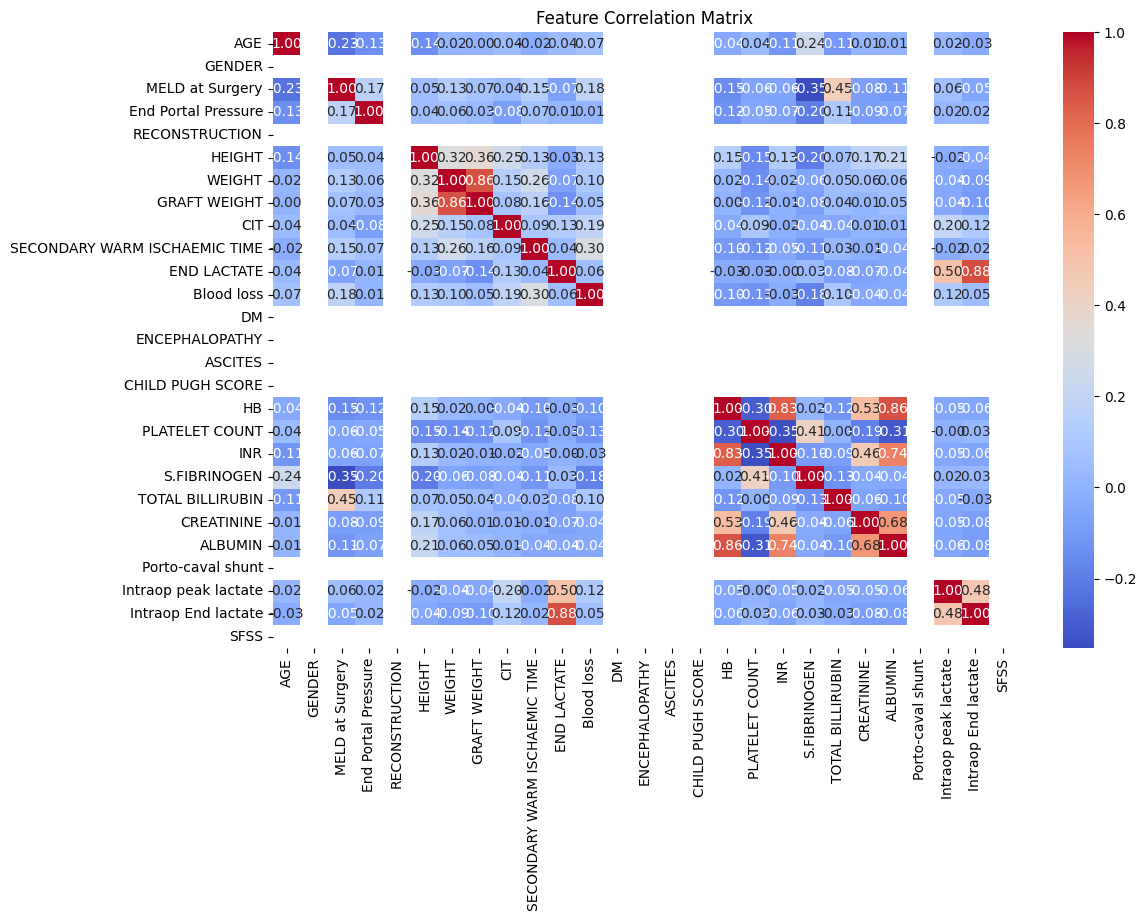

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df_selected.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [30]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df_selected.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
encoder = LabelEncoder()
for col in categorical_columns:
    df_selected[col] = encoder.fit_transform(df_selected[col])

print(df_selected.head())  # Check if categorical values are now numeric


   AGE  GENDER  MELD at Surgery  End Portal Pressure  RECONSTRUCTION  HEIGHT  \
0   62     NaN             25.0                 11.0             NaN   163.0   
1   41     NaN             19.0                 12.0             NaN   169.0   
2   39     NaN             32.0                 11.0             NaN   168.0   
3   67     NaN              9.0                 10.0             NaN   178.0   
4   35     NaN             18.0                 11.0             NaN   177.0   

   WEIGHT  GRAFT WEIGHT  CIT  SECONDARY WARM ISCHAEMIC TIME  ...  \
0    71.0         439.0   64                             32  ...   
1    72.9         557.0   77                             56  ...   
2    69.0         476.0  181                             53  ...   
3    81.0         631.0  153                             48  ...   
4    90.0         687.0   53                             34  ...   

   PLATELET COUNT   INR  S.FIBRINOGEN  TOTAL BILLIRUBIN  CREATININE  ALBUMIN  \
0         82000.0  1.69       

In [32]:
print(df_selected.isnull().sum())  # Count missing values per column

from sklearn.preprocessing import LabelEncoder

categorical_columns = df_selected.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
encoder = LabelEncoder()
for col in categorical_columns:
    df_selected[col] = encoder.fit_transform(df_selected[col])

print(df_selected.head())  # Check if categorical values are now numeric


AGE                                0
GENDER                           195
MELD at Surgery                    0
End Portal Pressure                0
RECONSTRUCTION                   195
HEIGHT                             0
WEIGHT                             0
GRAFT WEIGHT                       0
CIT                                0
SECONDARY WARM ISCHAEMIC TIME      0
END LACTATE                        0
Blood loss                         0
DM                               195
ENCEPHALOPATHY                   195
ASCITES                          195
CHILD PUGH SCORE                   0
HB                                 0
PLATELET COUNT                     0
INR                                0
S.FIBRINOGEN                       0
TOTAL BILLIRUBIN                   0
CREATININE                         0
ALBUMIN                            0
Porto-caval shunt                195
Intraop peak lactate               0
Intraop End lactate                0
SFSS                             195
d

In [33]:
df_selected.fillna(df_selected.mean(), inplace=True)

for col in categorical_columns:
    df_selected[col].fillna(df_selected[col].mode()[0], inplace=True)


In [34]:
print(df_selected.columns)





Index(['AGE', 'GENDER', 'MELD at Surgery', 'End Portal Pressure',
       'RECONSTRUCTION', 'HEIGHT', 'WEIGHT', 'GRAFT WEIGHT', 'CIT',
       'SECONDARY WARM ISCHAEMIC TIME', 'END LACTATE', 'Blood loss', 'DM',
       'ENCEPHALOPATHY', 'ASCITES', 'CHILD PUGH SCORE', 'HB', 'PLATELET COUNT',
       'INR', 'S.FIBRINOGEN', 'TOTAL BILLIRUBIN', 'CREATININE', 'ALBUMIN',
       'Porto-caval shunt', 'Intraop peak lactate', 'Intraop End lactate',
       'SFSS'],
      dtype='object')


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_selected_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)
print(df_selected_scaled.head())  # Check if values are now standardized

print([col for col in df_selected_scaled.columns if "SFSS" in col])

        AGE  GENDER  MELD at Surgery  End Portal Pressure  RECONSTRUCTION  \
0  1.130417     NaN         1.037204            -0.128623             NaN   
1 -0.928772     NaN         0.064045             0.393908             NaN   
2 -1.124886     NaN         2.172555            -0.128623             NaN   
3  1.620700     NaN        -1.557885            -0.651154             NaN   
4 -1.517112     NaN        -0.098148            -0.128623             NaN   

     HEIGHT    WEIGHT  GRAFT WEIGHT       CIT  SECONDARY WARM ISCHAEMIC TIME  \
0 -0.698113 -0.822649     -1.506025 -1.122780                      -0.896132   
1  0.020768 -0.686044     -0.337615 -0.883056                       0.529879   
2 -0.099046 -0.966445     -1.139659  1.034740                       0.351627   
3  1.099088 -0.103673      0.395116  0.518410                       0.054542   
4  0.979275  0.543406      0.949616 -1.325624                      -0.777297   

   ...  PLATELET COUNT       INR  S.FIBRINOGEN  TOTAL BI

C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [36]:
print(df_selected_scaled.columns)

print([col for col in df_selected_scaled.columns if "SFSS" in col])


Index(['AGE', 'GENDER', 'MELD at Surgery', 'End Portal Pressure',
       'RECONSTRUCTION', 'HEIGHT', 'WEIGHT', 'GRAFT WEIGHT', 'CIT',
       'SECONDARY WARM ISCHAEMIC TIME', 'END LACTATE', 'Blood loss', 'DM',
       'ENCEPHALOPATHY', 'ASCITES', 'CHILD PUGH SCORE', 'HB', 'PLATELET COUNT',
       'INR', 'S.FIBRINOGEN', 'TOTAL BILLIRUBIN', 'CREATININE', 'ALBUMIN',
       'Porto-caval shunt', 'Intraop peak lactate', 'Intraop End lactate',
       'SFSS'],
      dtype='object')
['SFSS']


In [37]:
X = df_selected_scaled.drop(columns=["SFSS"])
y = df_selected_scaled["SFSS"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (156, 26)
Testing set shape: (39, 26)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [40]:
print(df_selected["SFSS"].isnull().sum())  # Count missing values in SFSS

missing_percentage = df_selected["SFSS"].isnull().mean() * 100
print(f"SFSS missing percentage: {missing_percentage:.2f}%")

195
SFSS missing percentage: 100.00%


In [42]:
import pandas as pd

# Reload dataset (update 'your_file.csv' with actual filename)
df = pd.read_csv("Book2 for ML.csv")

# Check if SFSS column exists
print(df.columns)

# Count missing values in SFSS
print(df["SFSS"].isnull().sum(), "/", len(df))


FileNotFoundError: [Errno 2] No such file or directory: 'Book2 for ML.csv'